# Bienvenue à la GEP-OnSSET Notebook

Cette interface basée sur Jupyter a été conçue pour soutenir les scénarios de la Plate-forme mondiale d'électrification.


L'interface est construite sur une version modifiée de GEP-OnSSET développée par KTH dESA pour fournir un moyen facile et rapide de générer des scénarios d'investissement dans l'électrification compatibles avec les directives et les protocoles de données du GEP.


Suivez les étapes ci-dessous pour générer des perspectives d'investissement en électrification personnalisées pour le pays qui vous intéresse.

-------------------

**Note!** This notebook was translated to French by the participants of the EMPA-2023:
* [Djibo Boube Bachirou](https://www.linkedin.com/in/bachirou-djibo-boube-a45b02181/?locale=es_ES)
* [Marcel Aragah](https://www.linkedin.com/in/marcel-aragah-84569517a/?originalSubdomain=tg)
* [Eric King'ori](https://www.linkedin.com/in/eric-king-ori-1174a0187/)
* [Gilles Tounsi Kamdem](https://www.linkedin.com/in/gillestounsi/)
* [Nse-Abasi Ayara](https://github.com/Nayara2020)

The GEP-OnSSET development team would like to cordially thank the participants for their contribution!

-----------------------

#### Commencez par importer le code

In [1]:
from onsset import *
from IPython.display import display, Markdown, HTML
%matplotlib inline

2023-04-24 13:02:18,697		CACHEDIR=C:\Users\alexl\.matplotlib
2023-04-24 13:02:18,709		Using fontManager instance from C:\Users\alexl\.matplotlib\fontlist-v310.json
2023-04-24 13:02:18,834		Loaded backend module://ipykernel.pylab.backend_inline version unknown.
2023-04-24 13:02:18,841		Loaded backend module://ipykernel.pylab.backend_inline version unknown.
2023-04-24 13:02:18,844		Loaded backend module://ipykernel.pylab.backend_inline version unknown.


**Note**: Si vous rencontrez une erreur, veuillez vous référer à la section import du code onsset.py.

# 1. Sélection des données SIG

Tout d'abord, exécutez la cellule ci-dessous pour parcourir le répertoire dans lequel se trouve votre fichier CSV d'entrée et sélectionnez le fichier d'entrée. 


In [2]:
import tkinter as tk
from tkinter import filedialog, messagebox
from openpyxl import load_workbook
root = tk.Tk()
root.withdraw()
root.attributes("-topmost", True)
messagebox.showinfo('OnSSET', 'Ouvrez le fichier d\'entrée avec les données SIG extraites')
input_file = filedialog.askopenfilename()

onsseter = SettlementProcessor(input_file)

In [3]:
pv_path = os.path.abspath(os.path.join(r'.\Input', 'sl-2-pv.csv'))
wind_path = os.path.abspath(os.path.join(r'.\Input', 'sl-2-wind.csv'))

# 2. Entrez les données spécifiques au pays

En plus des options ci-dessus, l'utilisateur peut personnaliser un grand nombre de variables décrivant l'environnement socio-économique-technologique du pays sélectionné.

**Remarque!** La plupart des valeurs d'entrée doivent représenter des estimations pour la variable valable tout au long de la période de modélisation, c'est-à-dire **NE PAS** valeurs actuelle

#### **Période de modélisation et taux d'électrification cible**

Définissez ensuite la période de modélisation et le taux d'électrification à atteindre à la fin de l'analyse. Plus bas, vous définirez également une année et un objectif intermédiaires.

**Sur le GEP Explorer, l'objectif de taux d'électrification en fin d'année est fixé à 100 %, et l'objectif intermédiaire est fixé de manière à suivre une augmentation linéaire à partir du niveau actuel. Si, par exemple, un pays a un taux d'accès de 52 % en 2020, l'objectif serait d'augmenter le taux d'électrification d'environ 4 % par an pour atteindre 100 % en 2030. L'objectif intermédiaire serait donc de 80 % d'ici 2025**

In [4]:
start_year = 2020
end_year = 2030
electrification_rate_target = 1 # E.g. 1 for 100% electrification rate or 0.80 for 80% electrification rate 

intermediate_year = 2025
intermediate_electrification_target = 0.75 # E.g. for a target electrification rate of 75%, enter 0.75

yearsofanalysis = [intermediate_year, end_year]
eleclimits = {intermediate_year: intermediate_electrification_target, end_year: electrification_rate_target}
time_steps = {intermediate_year: intermediate_year-start_year, end_year: end_year-intermediate_year}

#### 3. Niveau cible de demande d'électricité

Il faut ensuite définir les valeurs des leviers. Il s'agit des 6 leviers disponibles sur le GEP Explorer. Contrairement au GEP Explorer où chaque levier a deux ou trois valeurs prédéfinies, ici ils peuvent prendre n'importe quelle valeur.

#### Niveau 1: Croissance de la population
Pour le premier Niveau, entrez la population prévue dans le pays à la fin de l'année de l'analyse (par exemple 2030). 

*Les valeurs par défaut dans le GEP Explorer sont basées sur la variante de croissance moyenne et la variante de croissance élevée de la base de données de l'ONU sur la population, trouvée <ahref="https://population.un.org/wpp/"*

In [5]:
end_year_pop = 9686665

#### Niveau 2: Demande cible d'électricification
Pour le deuxième niveau, saisissez le niveau cible (niveau d'accès à l'électricité) pour les ménages urbains et ruraux respectivement. Cette valeur peut être comprise entre "1" (niveau d'accès à l'électricité le plus bas) et "5" (niveau d'accès à l'électricité le plus élevé), comme dans le cadre multi-niveaux de l'ESMAP pour la mesure de l'accès à l'électricité (found <a href="https://www.esmap.org/node/55526" target="_blank">here</a>). Vous pouvez également saisir "6" pour utiliser une répartition des niveaux à travers le pays sur la base des niveaux de pauvreté et du PIB, conformément à la méthodologie trouvée <a href="https://www.mdpi.com/1996-1073/12/7/1395" target="_blank">here</a>.

*Sur le GEP Explorer, les trois objectifs de demande d'électricité suivants sont utilisés:*

*Top down demand target - Low: dans ce cas, tous les groupes urbains sont classés au niveau 1 pour atteindre le niveau de consommation moyen actuel des ménages électrifiés, et les établissements ruraux sont classés au niveau 1.*

*Top down demand target - High: dans ce cas, toutes les agglomérations urbaines sont ciblées pour atteindre un niveau supérieur au niveau de consommation moyen actuel des ménages électrifiés, et les établissements ruraux se voient attribuer le niveau 3*.

*Bottom up demand target (Poverty - GDP)(): Dans ce cas, chaque localité se voit attribuer un objectif de demande basé sur les niveaux de pauvreté et de PIB, comme décrit dans la méthodologie ci-dessus. Choisissez "6" pour le niveau cible urbain et le niveau cible rural pour utiliser cette option*. 

In [6]:
urban_target_tier = 4
rural_target_tier = 2

#### Niveau 3: Plan d'investissement intermédiaire
Pour le troisième lever, des restrictions peuvent être imposées sur le nombre de connexions au réseau qui peuvent être réalisées au cours d'une année.

*Sur le GEP Explorer, deux options permettent d'explorer la manière d'atteindre l'objectif d'électrification intermédiaire. Le scénario non plafonné suppose que le taux d'électrification augmente linéairement au cours des années de modélisation ; aucune restriction n'est fixée en termes de connexions au réseau réalisables par an. Le scénario de croissance plafonnée suppose que le taux d'électrification augmente comme dans le premier scénario, mais qu'il est soumis à une limitation des connexions au réseau, égale à 2,5 % de la population par an. Notez que sur la plateforme, aucune restriction n'est appliquée après 2025, la restriction pour 2030 est donc toujours fixée à "999999999"*.

In [7]:
# C'est le nombre maximum de nouveaux ménages qui peuvent être connectés au réseau en un an (en milliers).
annual_new_grid_connections_limit_intermediate = 999999999 # Limite par an de l'année de départ (par exemple 2018) à l'année intermédiaire (par exemple 2025)
annual_new_grid_connections_limit_end = 999999999 # Limite par an de l'année intermédiaire (par exemple 2025) à l'année finale (par exemple 2030)

#### Lever 4 : Coût de production de l'électricité sur le réseau
Ce Niveau examine les différents coûts moyens de production d'électricité par les centrales électriques connectées au réseau national. Ce coût est l'un des facteurs qui influencent le LCoE de la connexion au réseau (avec l'extension des lignes de réseau, etc.), et peut affecter la répartition entre les technologies en réseau et hors réseau.

*Sur le GEP Explorer, l'estimation du coût du raccordement au réseau est basée sur les plans nationaux ou sur un modèle d'optimisation de l'énergie. On suppose que le coût de l'alimentation par le réseau est supérieur de 25 %*.

In [8]:
grid_generation_cost = 0.047 ### Il s'agit du coût de l'électricité sur le réseau, en USD/kWh, tel qu'il est prévu à la fin de l'année de l'analyse.

#### Niveau 5 : Ajustement des coûts des systèmes photovoltaïques
Ce Niveau reflète le rôle des coûts des systèmes PV sur les résultats de l'électrification. Tous les systèmes photovoltaïques seront ajustés par un facteur pour simuler un coût plus élevé ou plus bas des systèmes photovoltaïques (par rapport aux valeurs de base saisies ci-dessous). Une valeur inférieure à 1 signifie des coûts d'investissement plus faibles pour les systèmes PV par rapport à la projection de base, et une valeur supérieure à 1 signifie des coûts d'investissement plus élevés pour les systèmes PV par rapport à la projection de base. Par exemple, "0,75" signifie un coût inférieur de 25 % aux coûts de référence.

*Sur le GEP Explorer, trois valeurs pour ce paramètre sont explorées:*

*Coût PV prévu : Facteur d'ajustement fixé à 1*

*Coût photovoltaïque élevé : Facteur d'ajustement fixé à 1,25 pour simuler des coûts 25% plus élevés*

*Coût PV faible : Facteur d'ajustement fixé à 0,75 pour simuler des coûts inférieurs de 25 %*.

In [9]:
pv_adjustment_factor = 1

#### Lever 6 : Plan de déploiement
Ce levier reflète l'approche d'électrification à examiner. Sur le GEP Explorer, deux options sont actuellement utilisées :

**Approche nationale du moindre coût:** Cette option vise à atteindre les objectifs de taux d'électrification fixés pour l'année intermédiaire et l'année finale. Pour les années où l'objectif est inférieur à 100%, l'algorithme donne la priorité à la densification du réseau (montée en puissance dans les clusters déjà électrifiés) puis à la sélection basée sur le coût d'investissement par habitant le plus bas pour choisir les clusters à électrifier. Remarque : une limite de capacité de production pour le réseau centralisé est appliquée afin de maintenir l'expansion du réseau à des niveaux raisonnables jusqu'à l'année intermédiaire. Sur le GEP Explorer, cela suit les tendances historiques pour les pays de la région qui ont géré la plus grande augmentation relative au cours des dernières années*.

**Approche de la grille forcée:** Elle peut prendre les formes suivantes.

- Réseau forcé dans une zone tampon définie (auto_intensification égale à Xkm) et approche du moindre coût en dehors de la zone tampon.

- Réseau forcé dans une zone tampon définie (auto_intensification égale à X km) et pas d'électrification en dehors de la zone tampon.

In [10]:
prioritization = 6                        # Sélectionnez 5, 4 ou 6 ; 5 = Approche nationale du moindre coût, 4 = Connexion forcée au réseau à l'intérieur d'une zone tampon uniquement, 6 = Connexion forcée au réseau à l'intérieur de la zone tampon + moindre coût à l'extérieur de la zone tampon.

auto_intensification = 2                 # Distance tampon (km) pour l'intensification automatique si l'on choisit l'ordre de priorité 4 ou 6

# Distance tampon (km) pour l'intensification automatique si l'on choisit l'ordre de priorité 4 ou 6

annual_grid_cap_gen_limit_intermediate = 54 # Limite par an entre l'année de départ (par exemple 2018) et l'année intermédiaire (par exemple 2025)
annual_grid_cap_gen_limit_end = 999999999 # Limite par an de l'année intermédiaire (par exemple 2025) à l'année finale (par exemple 2030)

# 4. Saisir des données spécifiques au pays

En plus des leviers ci-dessus, l'utilisateur peut personnaliser un grand nombre de variables décrivant l'environnement social, économique et technologique du pays sélectionné. 

**La plupart des valeurs saisies doivent représenter des estimations futures pour la variable, c'est-à-dire qu'elles décrivent et **NON** les valeurs actuelles.

### a. Démographie et composantes sociales

In [11]:
pop_start_year = 7946439       ### Écrire la population de l'année de base (par exemple 2020) 

urban_ratio_start_year = 0.421 ### Inscrivez le ratio de la population urbaine dans l'année de référence (par exemple 2020).
urban_ratio_end_year = 0.5     ### Indiquer le taux de population urbaine à la fin de l'année (par exemple 2030).

num_people_per_hh_urban = 4.4     ### Inscrivez le nombre de personnes par ménage prévu pour l'année finale (par exemple 2030).
num_people_per_hh_rural = 5.2   ### Inscrivez le nombre de personnes par ménage prévu pour l'année finale (par exemple 2030).

elec_ratio_start_year = 0.23   ### Inscrivez le taux d'électrification dans l'année de base (par exemple 2020)
urban_elec_ratio = 0.49       ### Écrire le taux d'électrification urbaine dans l'année de référence (par exemple 2020)
rural_elec_ratio = 0.05         ### Écrire le taux d'électrification rurale dans l'année de référence (par exemple 2020)

### b. Spécifications et coûts des technologies

La cellule ci-dessous contient toutes les informations utilisées pour calculer les coûts nivelés pour toutes les technologies, y compris le réseau. Ces valeurs par défaut doivent être mises à jour pour refléter les valeurs les plus précises du pays. Il y a actuellement 7 technologies potentielles à inclure dans le modèle :
* Réseau
* Mini-réseau photovoltaïque
* Mini-réseau éolien
* Mini-réseau hydroélectrique
* Mini-réseau diesel
* Systèmes PV autonomes
* Systèmes autonomes au diesel

Tout d'abord, il faut décider d'inclure ou non les technologies diesel :

In [12]:
diesel_techs = 0                        ### 0 = diesel NON inclus, 1 = diesel inclus 

In [13]:
grid_power_plants_capital_cost = 1363   ### Le coût en USD/kW correspond à l'augmentation de la capacité du réseau.
grid_losses = 0.167                     ### Fraction de l'électricité perdue lors du transport et de la distribution (en pourcentage)  

In [14]:
#diesel_price = 0.5           ### Il s'agit du prix du diesel en USD/litre tel qu'il est prévu à la fin de l'année de l'analyse.

diesel_price = 0.9
sa_diesel_cost = {'diesel_price': diesel_price,
                  'efficiency': 0.28,
                  'diesel_truck_consumption': 14,
                  'diesel_truck_volume': 300}

mg_diesel_cost = {'diesel_price': diesel_price,
                  'efficiency': 0.33,
                  'diesel_truck_consumption': 14,
                  'diesel_truck_volume': 300}

In [15]:
sa_diesel_capital_cost = {float("inf"): 938}      ### Coût d'investissement du diesel autonome (USD/kW) tel que prévu dans les années de l'analyse
#mg_diesel_capital_cost = {float("inf"): 900}
mg_pv_capital_cost = {float("inf"): 2000}
mg_diesel_capital_cost = {float("inf"): 721}      ### Coût d'investissement du mini-réseau diesel (USD/kW) tel que prévu dans les années de l'analyse
#mg_pv_capital_cost = {float("inf"): 2950}         ### Coût d'investissement des mini-réseaux photovoltaïques (USD/kW) tel qu'il est prévu pour les années de l'analyse
mg_wind_capital_cost = {float("inf"): 3750}       ### Mini-réseau Coût d'investissement de l'énergie éolienne (USD/kW) tel que prévu dans les années de l'analyse
mg_hydro_capital_cost = {float("inf"): 3000}      ### Coût d'investissement de Mini-grid Hydro (USD/kW) tel que prévu dans les années de l'analyse

In [16]:
sa_pv_capital_cost_1 = 9620          ### Coût d'investissement des systèmes photovoltaïques autonomes (USD/kW) pour les systèmes domestiques de moins de 20 W
sa_pv_capital_cost_2 = 8780          ### Coût d'investissement de l'énergie photovoltaïque autonome (USD/kW) pour les systèmes domestiques de 21 à 50 W
sa_pv_capital_cost_3 = 6380           ### Coût d'investissement des systèmes photovoltaïques autonomes (USD/kW) pour les systèmes domestiques de 51 à 100 W
sa_pv_capital_cost_4 = 4470           ### Coût d'investissement des systèmes photovoltaïques autonomes (USD/kW) pour les systèmes domestiques de 101 à 1000 W
sa_pv_capital_cost_5 = 6950           ### Coût d'investissement des systèmes photovoltaïques autonomes (USD/kW) pour les systèmes domestiques de plus de 1 kW

Les cellules ci-dessous contiennent des spécifications technologiques supplémentaires

In [17]:
discount_rate = 0.08 # E.g. 0.08 means a discount rate of 8%
existing_grid_cost_ratio = 0.1        ### Coût supplémentaire par cycle d'électrification (pourcentage) 

# Coûts de transport et de distribution
hv_line_capacity=69 # kV
hv_line_cost=53000 # USD/km
mv_line_cost = 7000 # USD/km
mv_line_capacity=33 # kV
mv_line_max_length=50 # km
mv_increase_rate=0.1   
max_mv_line_dist = 50 # km
MV_line_amperage_limit = 8  # Ampere (A)
lv_line_capacity=0.24 #kV
lv_line_max_length=0.5 # km
lv_line_cost=4250 # USD/km
service_Transf_type=50  # kVa
service_Transf_cost=4250  # $/unit
max_nodes_per_serv_trans=300  # maximum number of nodes served by each service transformer
hv_lv_transformer_cost=25000 # USD/unit
hv_mv_transformer_cost=25000 # USD/unit
mv_lv_transformer_cost=10000 # USD/unit
mv_mv_transformer_cost=10000 # USD/unit


# Coûts du réseau centralisé
grid_calc = Technology(om_of_td_lines=0.02,
                        distribution_losses=grid_losses,
                        connection_cost_per_hh=125,
                        base_to_peak_load_ratio=0.8,
                        capacity_factor=1,
                        tech_life=30,
                        grid_penalty_ratio=1,
                        grid_capacity_investment=grid_power_plants_capital_cost,
                        grid_price=grid_generation_cost)

mg_pv_hybrid_calc = Technology(om_of_td_lines=0.02,
                               distribution_losses=0.05,
                               connection_cost_per_hh=100,
                               capacity_factor=0.5,
                               tech_life=20,
                               mini_grid=True,
                               hybrid=True)

mg_wind_hybrid_calc = Technology(om_of_td_lines=0.02,
                                 distribution_losses=0.05,
                                 connection_cost_per_hh=100,
                                 capacity_factor=0.5,
                                 tech_life=20,
                                 mini_grid=True,
                                 hybrid=True)

# Coûts de l'hydroélectricité en mini-réseau
mg_hydro_calc = Technology(om_of_td_lines=0.02,
                            distribution_losses=0.05,
                            connection_cost_per_hh=100,
                            base_to_peak_load_ratio=0.85,
                            capacity_factor=0.5,
                            tech_life=30,
                            capital_cost=mg_hydro_capital_cost,
                            om_costs=0.02,
                            )

# Coûts des mini-réseaux éoliens
mg_wind_calc = Technology(om_of_td_lines=0.02,
                            distribution_losses=0.05,
                            connection_cost_per_hh=100,
                            base_to_peak_load_ratio=0.85,
                            capital_cost=mg_wind_capital_cost,
                            om_costs=0.02,
                            tech_life=20,
                            )

# Coûts de l'énergie photovoltaïque en mini-réseau
mg_pv_calc = Technology(om_of_td_lines=0.02,
                        distribution_losses=0.05,
                        connection_cost_per_hh=100,
                        base_to_peak_load_ratio=0.85,
                        tech_life=20,
                        om_costs=0.015,
                        capital_cost= mg_pv_capital_cost                        
                       )

# Coûts de l'énergie photovoltaïque autonome
sa_pv_calc = Technology(base_to_peak_load_ratio=0.9,
                        tech_life=15,
                        om_costs=0.02,
                        capital_cost={0.020: sa_pv_capital_cost_1 * pv_adjustment_factor, 
                                      0.050: sa_pv_capital_cost_2 * pv_adjustment_factor, 
                                      0.100: sa_pv_capital_cost_3 * pv_adjustment_factor, 
                                      1: sa_pv_capital_cost_4 * pv_adjustment_factor, 
                                      5: sa_pv_capital_cost_5 * pv_adjustment_factor},
                        standalone=True
                        )

# Coûts du diesel pour les mini-réseaux
mg_diesel_calc = Technology(om_of_td_lines=0.03,
                            distribution_losses=0.05,
                            connection_cost_per_hh=100,
                            base_to_peak_load_ratio=0.85,
                            capacity_factor=0.7,
                            tech_life=15,
                            om_costs=0.1,
                            efficiency=0.33,
                            capital_cost=mg_diesel_capital_cost,
                            diesel_price=diesel_price,
                            diesel_truck_consumption=33.7,
                            diesel_truck_volume=15000,
                            )

# Coûts du diesel autonome
sa_diesel_calc = Technology(base_to_peak_load_ratio=0.9,
                            capacity_factor=0.7,
                            tech_life=10,
                            om_costs=0.1,
                            capital_cost=sa_diesel_capital_cost,
                            diesel_price=diesel_price,
                            standalone=True,
                            efficiency=0.28,
                            diesel_truck_consumption=14,
                            diesel_truck_volume=300)

# 5. Calibrage des valeurs de l'année de démarrage et informations générales

Les étapes suivantes calibrent les conditions de l'année de démarrage dans le pays en termes de population et de taux d'électrification actuel, et ajoutent également quelques informations supplémentaires utiles à utiliser dans les calculs ultérieurs. Si vous avez récupéré le fichier d'entrée d'Energydata.info, certaines de ces étapes sont déjà réalisées, et vous pouvez sauter les cellules ci-dessous où il y a une note. 

In [18]:
pop_modelled, urban_modelled = onsseter.calibrate_current_pop_and_urban(pop_start_year, urban_ratio_start_year)

onsseter.project_pop_and_urban(pop_modelled, end_year_pop, urban_modelled, urban_ratio_end_year, start_year, end_year, intermediate_year)

display(Markdown('#### Le fichier csv a été importé correctement. Voici un aperçu:'))
display(onsseter.df[['Country','ElecPop','NightLights','TravelHours','GHI','WindVel','Hydropower','HydropowerDist']].sample(7))

#### Le fichier csv a été importé correctement. Voici un aperçu:

,Country,ElecPop,NightLights,TravelHours,GHI,WindVel,Hydropower,HydropowerDist
10370,Sierra_Leone,0,0.975934,1.450000,1856.0,2.968601,1351.950,8.462863
4080,Sierra_Leone,0,0.980145,0.483333,1837.0,2.734967,2493.150,2.155249
14201,Sierra_Leone,0,0.970992,1.216667,1852.0,2.790141,155.577,7.513509
1946,Sierra_Leone,0,0.975408,1.050000,1805.0,2.725426,4535.810,9.919279
9759,Sierra_Leone,0,0.987370,1.283333,1848.0,2.272415,354.648,8.199068
20276,Sierra_Leone,0,0.977411,4.400000,1929.0,2.501843,272.298,23.497205
9177,Sierra_Leone,0,0.962380,0.850000,1888.5,2.890099,104.255,27.129731


**Note!**
*Si vous avez récupéré un fichier d'entrée à partir du site Energydata.info, cette étape a déjà été réalisée et il n'est pas nécessaire de l'exécuter à nouveau. Vous pouvez passer à l'étape suivante*

In [19]:
onsseter.condition_df()
onsseter.df['GridPenalty'] = onsseter.grid_penalties(onsseter.df)
onsseter.df['WindCF'] = onsseter.calc_wind_cfs()

#### Calibrage des localités actuellement électrifiées

Le modèle calibre les localités susceptibles d'être électrifiées au cours de l'année de démarrage, afin de correspondre aux valeurs statistiques nationales définies ci-dessus. Une localité est considérée comme électrifiée si elle remplit toutes les conditions suivantes :
- A plus de lumières nocturnes que le seuil défini (ce paramètre est défini sur 0 par défaut)
- Est plus proche du réseau de distribution existant que la limite de distance
- A plus de population que le seuil

Définissez d'abord les seuils. Ensuite, lancez l'étalonnage et vérifiez si les résultats semblent corrects. Dans le cas contraire, redéfinissez ces seuils et relancez l'opération.

**Note!**
*Si vous avez récupéré un fichier d'entrée à partir du site Energydata.info, cette étape a déjà été réalisée et il n'est pas nécessaire de l'exécuter à nouveau. Vous pouvez passer à l'étape suivante*

In [20]:
min_night_lights = 0    ### 0 Indique qu'il n'y a pas d'éclairage de nuit, tandis que tout chiffre supérieur fait référence à l'intensité de l'éclairage de nuit.
min_pop = 50      ### Population de l'agglomération au-delà de laquelle on peut supposer qu'elle pourrait être électrifiée

max_service_transformer_distance = 2    ### Distance en km du réseau existant en dessous de laquelle on peut supposer qu'un village pourrait être électrifié
max_mv_line_distance = 2
max_hv_line_distance = 5

elec_modelled, urban_internal_elec_ratio, rural_internal_elec_ratio = onsseter.elec_current_and_future(elec_ratio_start_year, 
                                                                                                       urban_elec_ratio, 
                                                                                                       rural_elec_ratio, 
                                                                                                       start_year,
                                                                                                       min_night_lights=min_night_lights, 
                                                                                                       min_pop=min_pop, 
                                                                                                       max_transformer_dist=max_service_transformer_distance, 
                                                                                                       max_mv_dist=max_mv_line_distance, 
                                                                                                       max_hv_dist=max_hv_line_distance) 


Calibrating using distribution transformers
The national modelled electrification rate is 0.23. The modelled urban elec. rate is 0.54 The modelled rural elec. rate is 0.01


La figure ci-dessous montre les résultats de la calibration. Les localités en **bleu** sont considérées comme étant (au moins partiellement) électrifiées dès l'année de début de l'analyse, tandis que les localités en **gris* ne sont pas encore électrifiées. Une nouvelle exécution de l'étape de calibrage avec des valeurs initiales différentes peut modifier la carte ci-dessous.

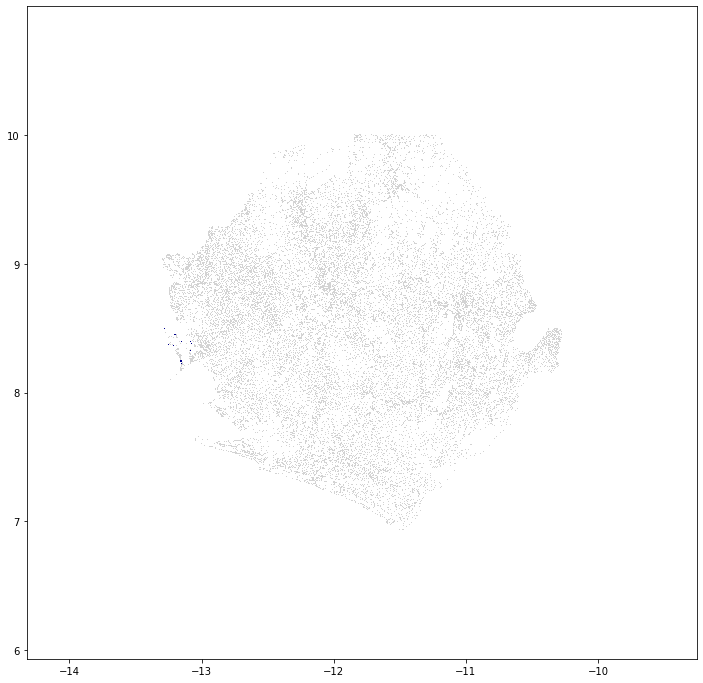

<Figure size 2160x2160 with 0 Axes>

In [21]:
from matplotlib import pyplot as plt
colors = ['#D3D3D3','#808080']
plt.figure(figsize=(12,12))
plt.plot(onsseter.df.loc[onsseter.df[SET_ELEC_CURRENT]==0, SET_X_DEG], onsseter.df.loc[onsseter.df[SET_ELEC_CURRENT]==0, SET_Y_DEG], color='#D3D3D3', marker=',', linestyle='none')
plt.plot(onsseter.df.loc[onsseter.df[SET_ELEC_CURRENT]==1, SET_X_DEG], onsseter.df.loc[onsseter.df[SET_ELEC_CURRENT]==1, SET_Y_DEG], color='#00008B', marker=',', linestyle='none')
if onsseter.df[SET_X_DEG].max() - onsseter.df[SET_X_DEG].min() > onsseter.df[SET_Y_DEG].max() - onsseter.df[SET_Y_DEG].min():
    plt.xlim(onsseter.df[SET_X_DEG].min() - 1, onsseter.df[SET_X_DEG].max() + 1)
    plt.ylim((onsseter.df[SET_Y_DEG].min()+onsseter.df[SET_Y_DEG].max())/2 - 0.5*abs(onsseter.df[SET_X_DEG].max() - onsseter.df[SET_X_DEG].min()) - 1, (onsseter.df[SET_Y_DEG].min()+onsseter.df[SET_Y_DEG].max())/2 + 0.5*abs(onsseter.df[SET_X_DEG].max() - onsseter.df[SET_X_DEG].min()) + 1)
else:
    plt.xlim((onsseter.df[SET_X_DEG].min()+onsseter.df[SET_X_DEG].max())/2 - 0.5*abs(onsseter.df[SET_Y_DEG].max() - onsseter.df[SET_Y_DEG].min()) - 1, (onsseter.df[SET_X_DEG].min()+onsseter.df[SET_X_DEG].max())/2 + 0.5*abs(onsseter.df[SET_Y_DEG].max() - onsseter.df[SET_Y_DEG].min()) + 1)
    plt.ylim(onsseter.df[SET_Y_DEG].min() -1, onsseter.df[SET_Y_DEG].max() +1)
plt.figure(figsize=(30,30))
logging.getLogger('matplotlib.font_manager').disabled = True

Dans certains cas, il peut être intéressant de filtrer les groupements très peu peuplés, par exemple pour augmenter la vitesse de calcul ou pour éliminer les faux positifs dans les données. En fixant la variable **pop_threshold** à une valeur inférieure à 0, toutes les localités dont la population est inférieure à ce seuil seront éliminées de l'analyse.

In [22]:
pop_threshold = 0  # Si vous souhaitez supprimer les cellules à faible densité de population, entrez un seuil supérieur à 0.
onsseter.df = onsseter.df.loc[onsseter.df[SET_POP] > pop_threshold]

# 6. Définir la demande

Ce morceau de code définit la demande d'électricité cible dans la région/le pays. La demande d'électricité résidentielle est définie en kWh/ménage/an, tandis que toutes les autres demandes sont définies en kWh/habitant/an. Notez qu'à l'heure actuelle, toutes les demandes liées aux utilisations productives sont fixées à 0 par défaut.

**Residential**

In [23]:
# Définir les objectifs annuels de consommation d'électricité des ménages à choisir
tier_1 = 38.7  # 38.7 refers to kWh/household/year. 
tier_2 = 219
tier_3 = 803
tier_4 = 2117
tier_5 = 2993

onsseter.prepare_wtf_tier_columns(num_people_per_hh_rural, num_people_per_hh_urban, tier_1, tier_2, tier_3, tier_4, tier_5)

**Non résidentiel**

**Note** La demande sociale et productive doit être définie lors de l'étape de préparation.

In [24]:
productive_demand = 1                     # 1 si la demande productive est définie et doit être incluse, sinon 0

# 7. Lancer un scénario qui calcule et compare les coûts des technologies pour chaque localité du pays.

Sur la base du calcul précédent, ce morceau de code identifie le LCoE que chaque technologie hors réseau peut fournir, pour chaque agglomération peuplée du pays sélectionné. La cellule prend ensuite tous les points actuellement raccordés au réseau dans le pays et examine les points situés à une certaine distance de ceux-ci, pour voir s'il est plus économique de les raccorder au réseau ou d'utiliser l'une des technologies hors réseau calculées ci-dessus. Une fois que d'autres points sont raccordés au réseau, le processus est répété, de sorte que de nouveaux points proches de ces points puissent également être raccordés. Ce processus est répété jusqu'à ce qu'il n'y ait plus de nouveaux points à connecter au réseau.

In [25]:
# Vous pouvez choisir de calculer la ventilation des coûts d'investissement (paramètre 1) ou uniquement l'investissement total (paramètre 2). Cette dernière option est plus rapide 
cost_choice = 2                ## L'option 1 n'est pas disponible dans cette version du code ; veuillez laisser la valeur 2.

In [26]:
onsseter.current_mv_line_dist()

try:
    onsseter.df.reset_index(inplace=True)
except ValueError:
    pass

Technology.set_default_values(base_year=start_year, start_year=start_year, end_year=end_year, discount_rate=discount_rate,
                             hv_line_type=hv_line_capacity, hv_line_cost=hv_line_cost, mv_line_type=mv_line_capacity,
                             mv_line_amperage_limit=MV_line_amperage_limit, mv_line_cost=mv_line_cost, lv_line_type=lv_line_capacity,
                             lv_line_cost=lv_line_cost, lv_line_max_length=lv_line_max_length, 
                             service_transf_type=service_Transf_type, service_transf_cost = service_Transf_cost,
                             max_nodes_per_serv_trans=max_nodes_per_serv_trans, mv_lv_sub_station_cost=mv_lv_transformer_cost,
                             mv_mv_sub_station_cost=mv_mv_transformer_cost, hv_lv_sub_station_cost=hv_lv_transformer_cost,
                             hv_mv_sub_station_cost=hv_mv_transformer_cost)

for year in yearsofanalysis:
        
    eleclimit = eleclimits[year]
    time_step = time_steps[year]
    
    
    if year == end_year:
        grid_connect_limit = time_step * annual_new_grid_connections_limit_end * 1000
        grid_cap_gen_limit = time_step * annual_grid_cap_gen_limit_end * 1000
    else:
        grid_connect_limit = time_step * annual_new_grid_connections_limit_intermediate * 1000
        grid_cap_gen_limit = time_step * annual_grid_cap_gen_limit_intermediate * 1000
        
    onsseter.set_scenario_variables(year, num_people_per_hh_rural, num_people_per_hh_urban, time_step,
                                            start_year, urban_target_tier, 
                                            rural_target_tier, productive_demand)

    
    onsseter.diesel_cost_columns(sa_diesel_cost, mg_diesel_cost, year)
    
    
    mg_pv_hybrid_investment, mg_pv_hybrid_capacity = onsseter.calculate_pv_hybrids_lcoe(year, 
                                                                                        year - time_step, 
                                                                                        end_year, 
                                                                                        time_step, 
                                                                                        mg_pv_hybrid_calc,
                                                                                        1, 
                                                                                        pv_path)

    mg_wind_hybrid_investment, mg_wind_hybrid_capacity = onsseter.calculate_wind_hybrids_lcoe(year,
                                                                                              year - time_step,
                                                                                              end_year,
                                                                                              time_step,
                                                                                              mg_wind_hybrid_calc,
                                                                                              wind_path)

    sa_diesel_investment, sa_pv_investment, mg_diesel_investment, \
    mg_wind_investment, mg_hydro_investment, mg_pv_investment = onsseter.calculate_off_grid_lcoes(mg_hydro_calc, 
                                                                                                  mg_wind_calc, 
                                                                                                  mg_pv_calc, 
                                                                                                  sa_pv_calc, 
                                                                                                  mg_diesel_calc,
                                                                                                  sa_diesel_calc, 
                                                                                                  year, 
                                                                                                  end_year, 
                                                                                                  time_step,
                                                                                                  diesel_techs)

    grid_investment, grid_cap_gen_limit, grid_connect_limit = onsseter.pre_electrification(grid_generation_cost, 
                                                                                           year, 
                                                                                           time_step, 
                                                                                           end_year, 
                                                                                           grid_calc, 
                                                                                           grid_cap_gen_limit,
                                                                                           grid_connect_limit)

    onsseter.df[SET_LCOE_GRID + "{}".format(year)], onsseter.df[SET_MIN_GRID_DIST + "{}".format(year)], \
    onsseter.df[SET_ELEC_ORDER + "{}".format(year)], onsseter.df[SET_MV_CONNECT_DIST], grid_investment = \
    onsseter.elec_extension(grid_calc,
                            mv_line_max_length,
                            year,
                            start_year,
                            end_year,
                            time_step,
                            grid_cap_gen_limit,
                            grid_connect_limit,
                            auto_intensification=auto_intensification,
                            prioritization=5,
                            new_investment=grid_investment,
                            threshold=9999999999)

    onsseter.results_columns(year, time_step, 5, auto_intensification)

    onsseter.calculate_investments(sa_diesel_investment, sa_pv_investment, mg_diesel_investment,
                                   mg_pv_investment, mg_wind_investment, mg_hydro_investment, 
                                   mg_pv_hybrid_investment, mg_wind_hybrid_investment, grid_investment, year)

    onsseter.apply_limitations(eleclimit, year, time_step, 5, auto_intensification)

    onsseter.calculate_new_capacity(mg_pv_hybrid_capacity, mg_wind_hybrid_capacity, mg_hydro_calc, mg_wind_calc,
                                            mg_pv_calc, sa_pv_calc, mg_diesel_calc, sa_diesel_calc, grid_calc, year)
    
    onsseter.tech_code_update_jn(year, time_step)

    #onsseter.calc_summaries(df_summary, sumtechs, year)

The electrification rate achieved in 2025 is 75.0 %
The electrification rate achieved in 2030 is 100.0 %


In [27]:
#onsseter.df.columns

# 8. Résultats, résumés et visualisation
Une fois tous les calculs et les extensions de réseau terminés, ce bloc permet d'obtenir les résultats finaux concernant la technologie choisie pour chaque point, la capacité à installer et son coût. Les résumés, les graphiques et les cartes sont ensuite générés.

In [28]:
elements = []
for year in yearsofanalysis:
    elements.append("Population{}".format(year))
    elements.append("NewConnections{}".format(year))
    elements.append("Capacity{}".format(year))
    elements.append("Investment{}".format(year))

techs = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "99"]

sumtechs = []
for year in yearsofanalysis:
    sumtechs.extend(["Population{}".format(year) + t for t in techs])
    sumtechs.extend(["NewConnections{}".format(year) + t for t in techs])
    sumtechs.extend(["Capacity{}".format(year) + t for t in techs])
    sumtechs.extend(["Investment{}".format(year) + t for t in techs])
    
if cost_choice == 1:
    for year in yearsofanalysis:
        sumtechs.extend(["InvestmentCostLV{}".format(year) + t for t in techs])
        sumtechs.extend(["InvestmentCostMV{}".format(year) + t for t in techs])
        sumtechs.extend(["InvestmentCostHV{}".format(year) + t for t in techs])
        sumtechs.extend(["InvestmentCostTransformer{}".format(year) + t for t in techs])
        sumtechs.extend(["InvestmentCostConnection{}".format(year) + t for t in techs])
        sumtechs.extend(["CapitalCapacityInvestment{}".format(year) + t for t in techs])
        sumtechs.extend(["RecurringCosts{}".format(year) + t for t in techs])
    else:
        pass

summary = pd.Series(index=sumtechs, name='country')

if cost_choice == 1:
    for year in yearsofanalysis:
        for t in techs:
            summary.loc["Population{}".format(year) + t] = onsseter.df.loc[(onsseter.df[SET_MIN_OVERALL + '{}'.format(year)] == t + '{}'.format(year)) & (onsseter.df[SET_ELEC_FINAL_CODE + '{}'.format(year)] < 99), SET_POP + '{}'.format(year)].sum()
            summary.loc["NewConnections{}".format(year) + t] = onsseter.df.loc[(onsseter.df[SET_MIN_OVERALL + '{}'.format(year)] == t + '{}'.format(year)) & (onsseter.df[SET_ELEC_FINAL_CODE + '{}'.format(year)] < 99), SET_NEW_CONNECTIONS + '{}'.format(year)].sum()
            summary.loc["Capacity{}".format(year) + t] = onsseter.df.loc[(onsseter.df[SET_MIN_OVERALL + '{}'.format(year)] == t + '{}'.format(year)) & (onsseter.df[SET_ELEC_FINAL_CODE + '{}'.format(year)] < 99), SET_NEW_CAPACITY + '{}'.format(year)].sum()/1000
            summary.loc["Investment{}".format(year) + t] = onsseter.df.loc[(onsseter.df[SET_MIN_OVERALL + '{}'.format(year)] == t + '{}'.format(year)) & (onsseter.df[SET_ELEC_FINAL_CODE + '{}'.format(year)] < 99), SET_INVESTMENT_COST + '{}'.format(year)].sum()
            summary.loc["InvestmentCostLV{}".format(year) + t] = onsseter.df.loc[(onsseter.df[SET_MIN_OVERALL + '{}'.format(year)] == t + '{}'.format(year)) & (onsseter.df[SET_ELEC_FINAL_CODE + '{}'.format(year)] < 99), "InvestmentCostLV" + '{}'.format(year)].sum()
            summary.loc["InvestmentCostMV{}".format(year) + t] = onsseter.df.loc[(onsseter.df[SET_MIN_OVERALL + '{}'.format(year)] == t + '{}'.format(year)) & (onsseter.df[SET_ELEC_FINAL_CODE + '{}'.format(year)] < 99), "InvestmentCostMV" + '{}'.format(year)].sum()
            summary.loc["InvestmentCostHV{}".format(year) + t] = onsseter.df.loc[(onsseter.df[SET_MIN_OVERALL + '{}'.format(year)] == t + '{}'.format(year)) & (onsseter.df[SET_ELEC_FINAL_CODE + '{}'.format(year)] < 99), "InvestmentCostHV" + '{}'.format(year)].sum()
            summary.loc["InvestmentCostTransformer{}".format(year) + t] = onsseter.df.loc[(onsseter.df[SET_MIN_OVERALL + '{}'.format(year)] == t + '{}'.format(year)) & (onsseter.df[SET_ELEC_FINAL_CODE + '{}'.format(year)] < 99), "InvestmentCostTransformer" + '{}'.format(year)].sum()
            summary.loc["InvestmentCostConnection{}".format(year) + t] = onsseter.df.loc[(onsseter.df[SET_MIN_OVERALL + '{}'.format(year)] == t + '{}'.format(year)) & (onsseter.df[SET_ELEC_FINAL_CODE + '{}'.format(year)] < 99), "InvestmentCostConnection" + '{}'.format(year)].sum()
            summary.loc["CapitalCapacityInvestment{}".format(year) + t] = onsseter.df.loc[(onsseter.df[SET_MIN_OVERALL + '{}'.format(year)] == t + '{}'.format(year)) & (onsseter.df[SET_ELEC_FINAL_CODE + '{}'.format(year)] < 99), "CapitalCapacityInvestment" + '{}'.format(year)].sum()
            summary.loc["RecurringCosts{}".format(year) + t] = onsseter.df.loc[(onsseter.df[SET_MIN_OVERALL + '{}'.format(year)] == t + '{}'.format(year)) & (onsseter.df[SET_ELEC_FINAL_CODE + '{}'.format(year)] < 99), "RecurringCosts" + '{}'.format(year)].sum()
else:
    for year in yearsofanalysis:
        for t in techs:
            summary.loc["Population{}".format(year) + t] = onsseter.df.loc[(onsseter.df[SET_ELEC_FINAL_CODE + '{}'.format(year)] == int(t)), SET_POP + '{}'.format(year)].sum()
            summary.loc["NewConnections{}".format(year) + t] = onsseter.df.loc[(onsseter.df[SET_ELEC_FINAL_CODE + '{}'.format(year)] == int(t)), SET_NEW_CONNECTIONS + '{}'.format(year)].sum()
            summary.loc["Capacity{}".format(year) + t] = onsseter.df.loc[(onsseter.df[SET_ELEC_FINAL_CODE + '{}'.format(year)] == int(t)) & (onsseter.df[SET_ELEC_FINAL_CODE + '{}'.format(year)] < 99), SET_NEW_CAPACITY + '{}'.format(year)].sum()/1000
            summary.loc["Investment{}".format(year) + t] = onsseter.df.loc[(onsseter.df[SET_ELEC_FINAL_CODE + '{}'.format(year)] == int(t)) & (onsseter.df[SET_ELEC_FINAL_CODE + '{}'.format(year)] < 99), SET_INVESTMENT_COST + '{}'.format(year)].sum()
    
summary = summary.fillna(0)
     
index = techs + ['Total']
columns = []

if cost_choice == 1:
    for year in yearsofanalysis:
        columns.append("Population{}".format(year))
        columns.append("NewConnections{}".format(year))
        columns.append("Capacity{} (MW)".format(year))
        columns.append("Investment{} (million USD)".format(year))
        columns.append("InvestmentLV{} (million USD)".format(year))
        columns.append("InvestmentMV{} (million USD)".format(year))
        columns.append("InvestmentHV{} (million USD)".format(year))
        columns.append("InvestmentTrans{} (million USD)".format(year))
        columns.append("InvestmentCon{} (million USD)".format(year))
        columns.append("InvestmentCap{} (million USD)".format(year))
        columns.append("RecurringCosts{} (million USD)".format(year))
else:
    for year in yearsofanalysis:
        columns.append("Population{}".format(year))
        columns.append("NewConnections{}".format(year))
        columns.append("Capacity{} (MW)".format(year))
        columns.append("Investment{} (million USD)".format(year))
    
summary_table = pd.DataFrame(index=index, columns=columns)

if cost_choice == 1:
    summary_table[columns[0]] = summary.iloc[0:7].astype(int).tolist() + [int(summary.iloc[0:7].sum())]
    summary_table[columns[1]] = summary.iloc[7:14].astype(int).tolist() + [int(summary.iloc[7:14].sum())]
    summary_table[columns[2]] = summary.iloc[14:21].astype(int).tolist() + [int(summary.iloc[14:21].sum())]
    summary_table[columns[3]] = [round(x/1e4)/1e2 for x in summary.iloc[21:28].astype(float).tolist()] + [round(summary.iloc[21:28].sum()/1e4)/1e2]
    summary_table[columns[4]] = [round(x/1e4)/1e2 for x in summary.iloc[56:63].astype(float).tolist()] + [round(summary.iloc[56:63].sum()/1e4)/1e2]
    summary_table[columns[5]] = [round(x/1e4)/1e2 for x in summary.iloc[63:70].astype(float).tolist()] + [round(summary.iloc[63:70].sum()/1e4)/1e2]
    summary_table[columns[6]] = [round(x/1e4)/1e2 for x in summary.iloc[70:77].astype(float).tolist()] + [round(summary.iloc[70:77].sum()/1e4)/1e2]
    summary_table[columns[7]] = [round(x/1e4)/1e2 for x in summary.iloc[77:84].astype(float).tolist()] + [round(summary.iloc[77:84].sum()/1e4)/1e2]
    summary_table[columns[8]] = [round(x/1e4)/1e2 for x in summary.iloc[84:91].astype(float).tolist()] + [round(summary.iloc[84:91].sum()/1e4)/1e2]
    summary_table[columns[9]] = [round(x/1e4)/1e2 for x in summary.iloc[91:98].astype(float).tolist()] + [round(summary.iloc[91:98].sum()/1e4)/1e2]
    summary_table[columns[10]] = [round(x/1e4)/1e2 for x in summary.iloc[98:105].astype(float).tolist()] + [round(summary.iloc[98:105].sum()/1e4)/1e2]
    
    summary_table[columns[11]] = summary.iloc[28:35].astype(int).tolist() + [int(summary.iloc[28:35].sum())]
    summary_table[columns[12]] = summary.iloc[35:42].astype(int).tolist() + [int(summary.iloc[35:42].sum())]
    summary_table[columns[13]] = summary.iloc[42:49].astype(int).tolist() + [int(summary.iloc[42:49].sum())]
    summary_table[columns[14]] = [round(x/1e4)/1e2 for x in summary.iloc[49:56].astype(float).tolist()] + [round(summary.iloc[49:56].sum()/1e4)/1e2]
    summary_table[columns[15]] = [round(x/1e4)/1e2 for x in summary.iloc[105:112].astype(float).tolist()] + [round(summary.iloc[105:112].sum()/1e4)/1e2]
    summary_table[columns[16]] = [round(x/1e4)/1e2 for x in summary.iloc[112:119].astype(float).tolist()] + [round(summary.iloc[112:119].sum()/1e4)/1e2]
    summary_table[columns[17]] = [round(x/1e4)/1e2 for x in summary.iloc[119:126].astype(float).tolist()] + [round(summary.iloc[119:126].sum()/1e4)/1e2]
    summary_table[columns[18]] = [round(x/1e4)/1e2 for x in summary.iloc[126:133].astype(float).tolist()] + [round(summary.iloc[126:133].sum()/1e4)/1e2]
    summary_table[columns[19]] = [round(x/1e4)/1e2 for x in summary.iloc[133:140].astype(float).tolist()] + [round(summary.iloc[133:140].sum()/1e4)/1e2]
    summary_table[columns[20]] = [round(x/1e4)/1e2 for x in summary.iloc[140:147].astype(float).tolist()] + [round(summary.iloc[140:147].sum()/1e4)/1e2]
    summary_table[columns[21]] = [round(x/1e4)/1e2 for x in summary.iloc[147:154].astype(float).tolist()] + [round(summary.iloc[147:154].sum()/1e4)/1e2]
else:
    summary_table[columns[0]] = summary.iloc[0:11].astype(int).tolist() + [int(summary.iloc[0:11].sum())]
    summary_table[columns[1]] = summary.iloc[11:22].astype(int).tolist() + [int(summary.iloc[11:22].sum())]
    summary_table[columns[2]] = summary.iloc[22:33].astype(int).tolist() + [int(summary.iloc[22:33].sum())]
    summary_table[columns[3]] = [round(x/1e4)/1e2 for x in summary.iloc[33:44].astype(float).tolist()] + [round(summary.iloc[33:44].sum()/1e4)/1e2]
    summary_table[columns[4]] = summary.iloc[44:55].astype(int).tolist() + [int(summary.iloc[44:55].sum())]
    summary_table[columns[5]] = summary.iloc[55:66].astype(int).tolist() + [int(summary.iloc[55:66].sum())]
    summary_table[columns[6]] = summary.iloc[66:77].astype(int).tolist() + [int(summary.iloc[66:77].sum())]
    summary_table[columns[7]] = [round(x/1e4)/1e2 for x in summary.iloc[77:88].astype(float).tolist()] + [round(summary.iloc[77:88].sum()/1e4)/1e2]
    
map_dict = {'1': 'Grid_dens', 
            '2': 'SA_Diesel', 
            '3': 'SA_PV', 
            '4': 'MG_Diesel', 
            '5': 'MG_PV', 
            '6': 'MG_Wind', 
            '7': 'MG_Hydro', 
            '8': 'MG_PV_Hybrid', 
            '9': 'MG_Wind_Hybrid', 
            '10':'Grid_ext', 
            '99':'Non-electrified',
            'Total': 'Total'}

summary_table.index = summary_table.index.to_series().map(map_dict)

In [36]:
display(Markdown('### Résumé \n Voici les résultats résumés du pays sélectionné'))
summary_table

### Résumé 
 Voici les résultats résumés du pays sélectionné

,Population2025,NewConnections2025,Capacity2025 (MW),Investment2025 (million USD),Population2030,NewConnections2030,Capacity2030 (MW),Investment2030 (million USD)
Grid_dens,2572809,745128,98,188.32,3099343,526548,69,131.48
SA_Diesel,0,0,0,0.00,0,0,0,0.00
SA_PV,576388,576388,16,75.55,1166045,598143,18,81.89
MG_Diesel,0,0,0,0.00,0,0,0,0.00
MG_PV,0,0,0,0.00,0,0,0,0.00
MG_Wind,0,0,0,0.00,0,0,0,0.00
MG_Hydro,92131,92131,2,10.12,74114,10134,0,1.81
MG_PV_Hybrid,2385220,2385220,90,253.88,2663470,91263,3,42.43
MG_Wind_Hybrid,0,0,0,0.00,0,0,0,0.00
Grid_ext,931469,931469,16,84.04,2683690,1914994,216,483.34


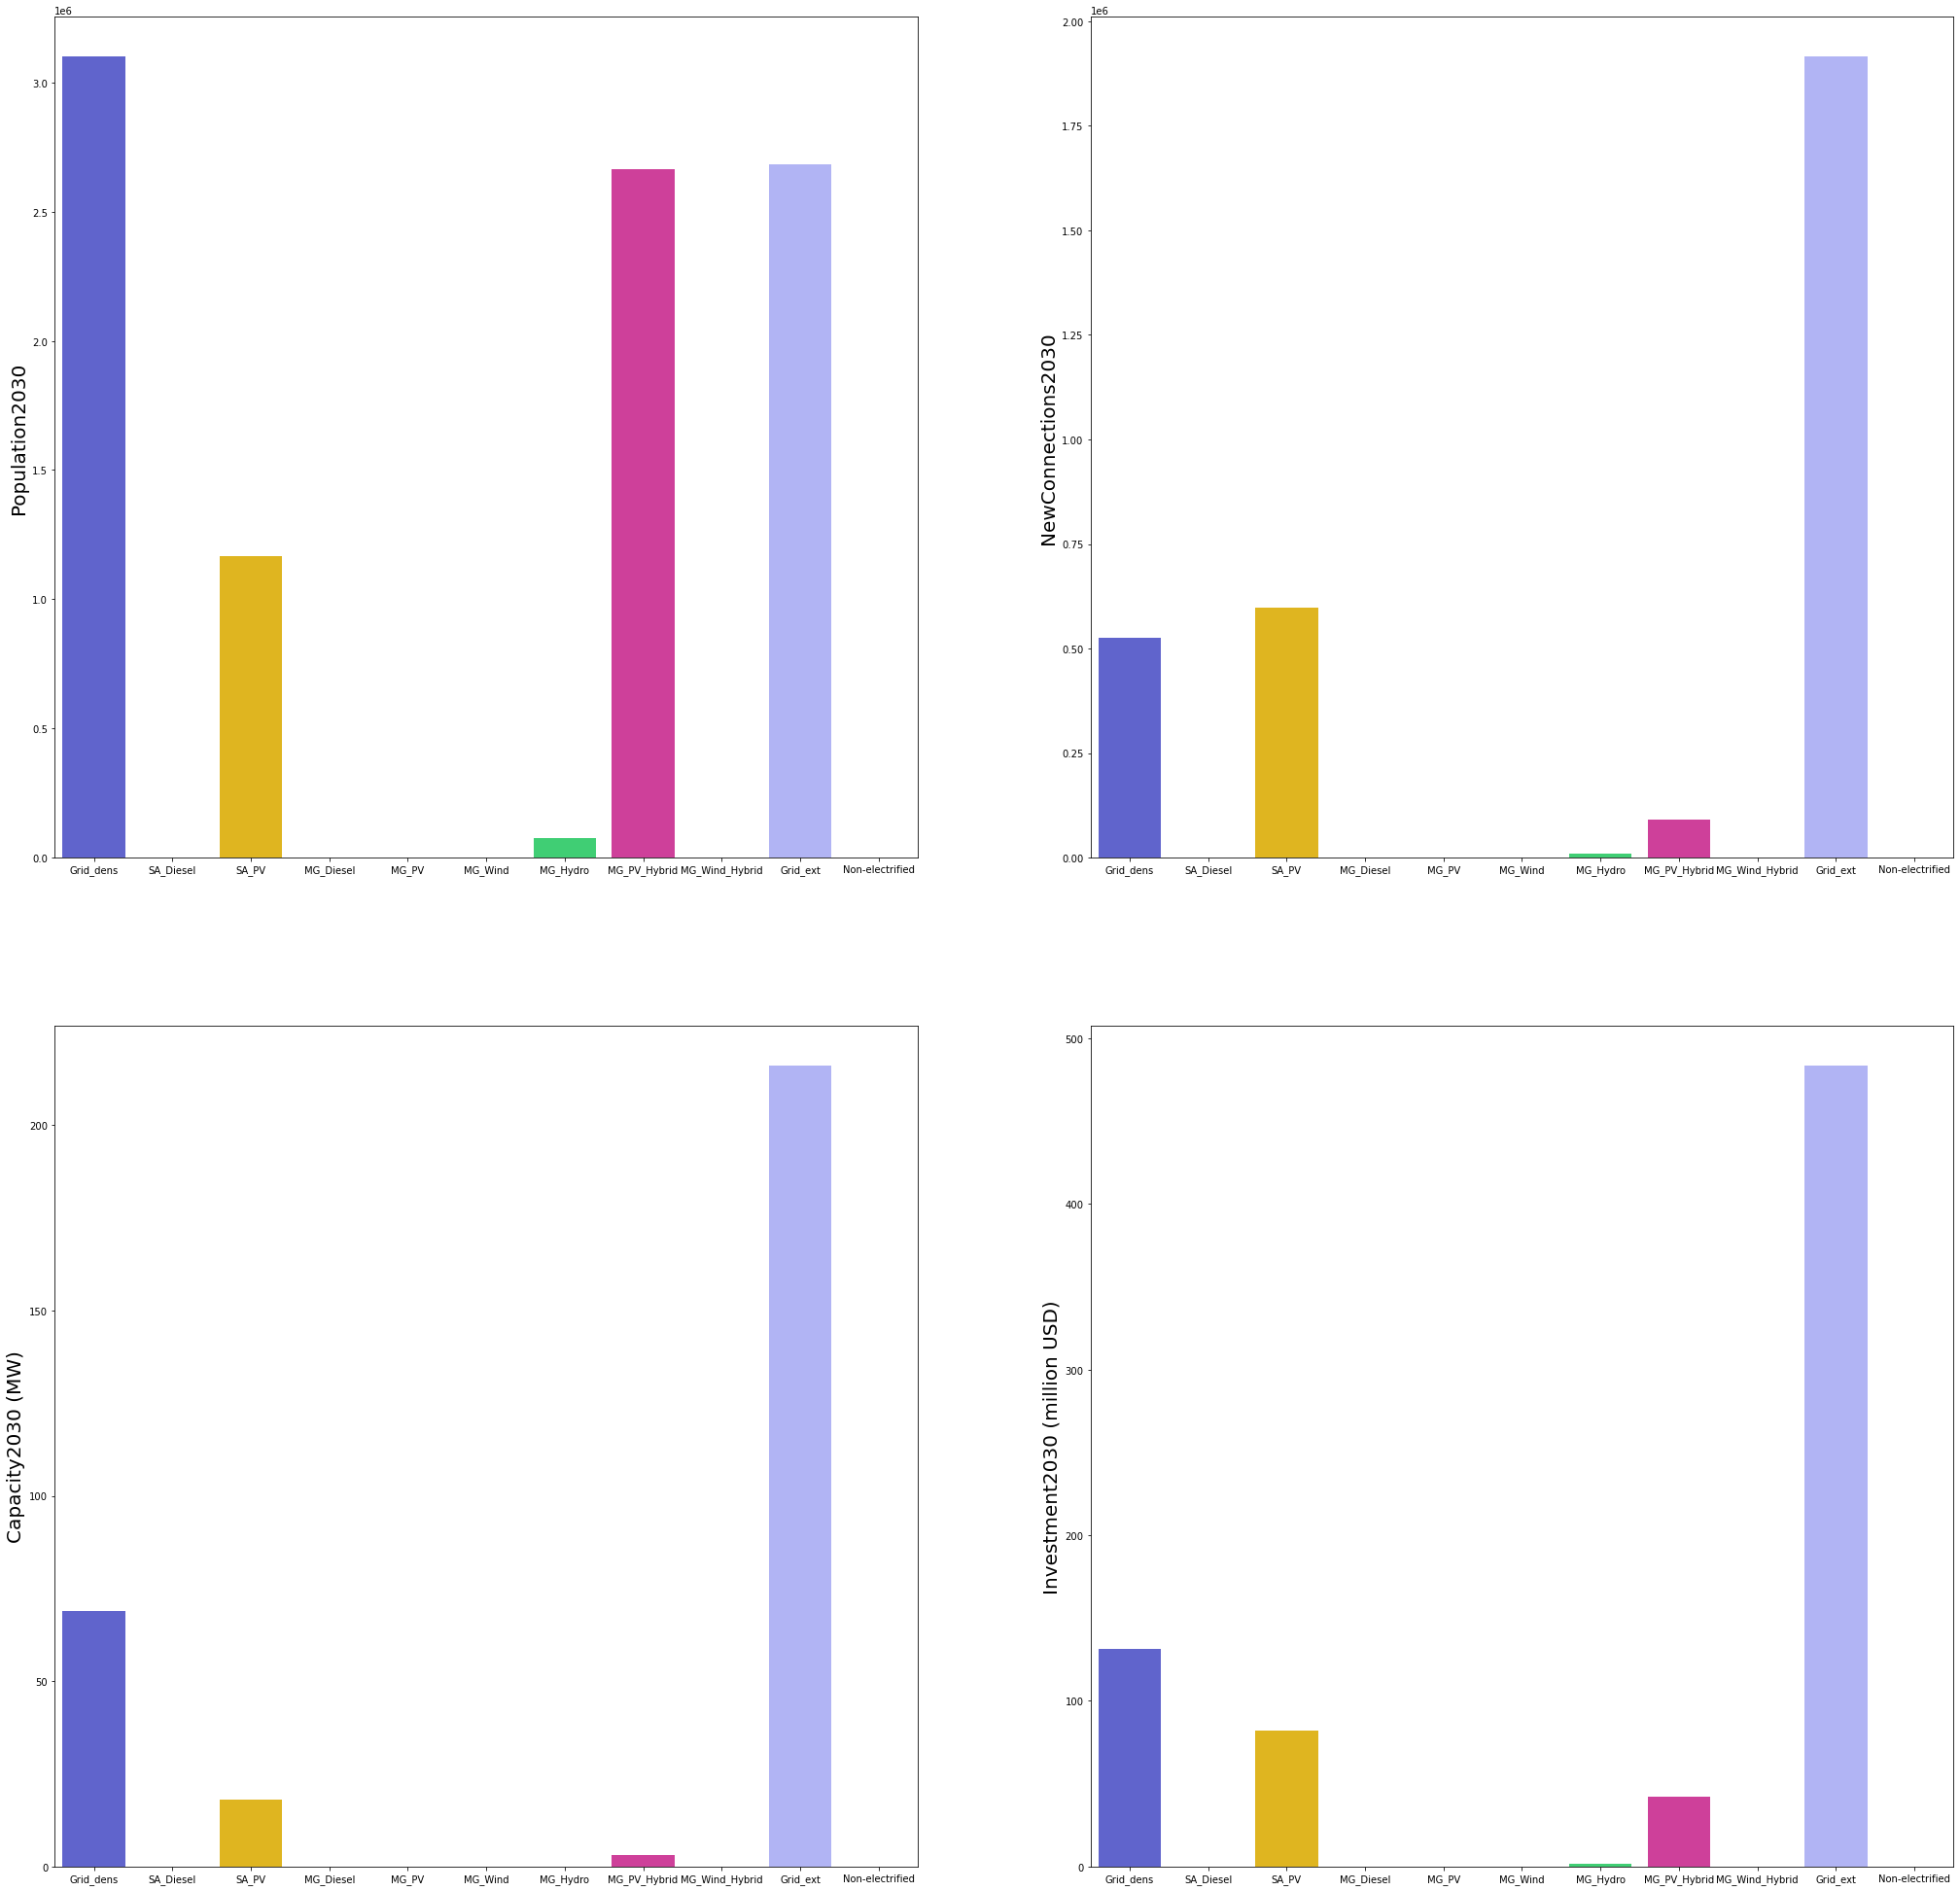

In [30]:
import matplotlib.pylab as plt
import seaborn as sns

colors = ['#4e53de','#EDD100','#ffc700','#1F6600','#98E600','#70A800','#28e66d', '#e628a0', '#1b8f4d', '#a6aaff', '#D3D3D3']
techs_colors = dict(zip(techs, colors))

summary_plot=summary_table.drop(labels='Total',axis=0)
fig_size = [35, 35]
font_size = 1
plt.rcParams["figure.figsize"] = fig_size
f, axarr = plt.subplots(2, 2)
fig_size = [15, 15]
font_size = 10
plt.rcParams["figure.figsize"] = fig_size

if cost_choice == 1:
    sns.barplot(x=summary_plot.index.tolist(), y=columns[11], data=summary_plot, ax=axarr[0, 0], palette=colors)
    axarr[0, 0].set_ylabel(columns[4], fontsize=2*font_size)
    axarr[0, 0].tick_params(labelsize=font_size)
    sns.barplot(x=summary_plot.index.tolist(), y=columns[12], data=summary_plot, ax=axarr[0, 1], palette=colors)
    axarr[0, 1].set_ylabel(columns[5], fontsize=2*font_size)
    axarr[0, 1].tick_params(labelsize=font_size)
    sns.barplot(x=summary_plot.index.tolist(), y=columns[13], data=summary_plot, ax=axarr[1, 0], palette=colors)
    axarr[1, 0].set_ylabel(columns[6], fontsize=2*font_size)
    axarr[1, 0].tick_params(labelsize=font_size)
    sns.barplot(x=summary_plot.index.tolist(), y=columns[14], data=summary_plot, ax=axarr[1, 1], palette=colors)
    axarr[1, 1].set_ylabel(columns[7], fontsize=2*font_size)
    axarr[1, 1].tick_params(labelsize=font_size)
else:
    sns.barplot(x=summary_plot.index.tolist(), y=columns[4], data=summary_plot, ax=axarr[0, 0], palette=colors)
    axarr[0, 0].set_ylabel(columns[4], fontsize=2*font_size)
    axarr[0, 0].tick_params(labelsize=font_size)
    sns.barplot(x=summary_plot.index.tolist(), y=columns[5], data=summary_plot, ax=axarr[0, 1], palette=colors)
    axarr[0, 1].set_ylabel(columns[5], fontsize=2*font_size)
    axarr[0, 1].tick_params(labelsize=font_size)
    sns.barplot(x=summary_plot.index.tolist(), y=columns[6], data=summary_plot, ax=axarr[1, 0], palette=colors)
    axarr[1, 0].set_ylabel(columns[6], fontsize=2*font_size)
    axarr[1, 0].tick_params(labelsize=font_size)
    sns.barplot(x=summary_plot.index.tolist(), y=columns[7], data=summary_plot, ax=axarr[1, 1], palette=colors)
    axarr[1, 1].set_ylabel(columns[7], fontsize=2*font_size)
    axarr[1, 1].tick_params(labelsize=font_size)

<Figure size 720x720 with 0 Axes>

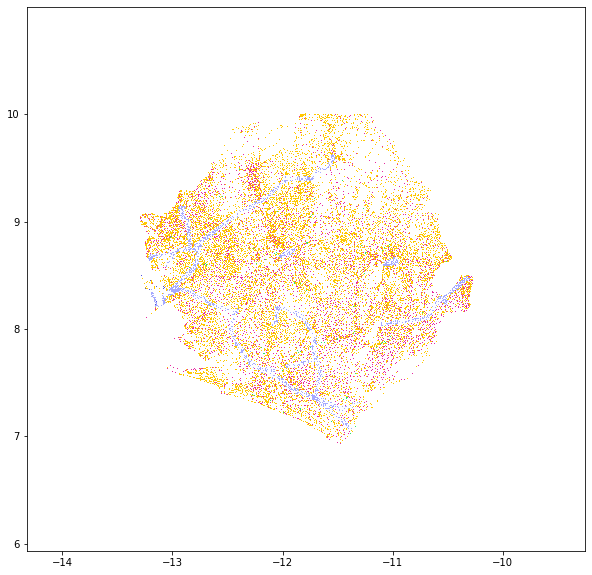

<Figure size 720x720 with 0 Axes>

In [31]:
from matplotlib import pyplot as plt
colors = ['#4e53de','#EDD100','#ffc700','#1F6600','#98E600','#70A800','#28e66d', '#e628a0', '#1b8f4d', '#a6aaff', '#D3D3D3']
plt.figure(figsize=(10,10))
plt.plot(onsseter.df.loc[onsseter.df['FinalElecCode{}'.format(end_year)]==3, SET_X_DEG], onsseter.df.loc[onsseter.df['FinalElecCode{}'.format(end_year)]==3, SET_Y_DEG], color='#ffc700', marker=',', linestyle='none')
plt.plot(onsseter.df.loc[onsseter.df['FinalElecCode{}'.format(end_year)]==2, SET_X_DEG], onsseter.df.loc[onsseter.df['FinalElecCode{}'.format(end_year)]==2, SET_Y_DEG], color='#a6aaff', marker=',', linestyle='none')
plt.plot(onsseter.df.loc[onsseter.df['FinalElecCode{}'.format(end_year)]==4, SET_X_DEG], onsseter.df.loc[onsseter.df['FinalElecCode{}'.format(end_year)]==4, SET_Y_DEG], color='#1F6600', marker=',', linestyle='none')
plt.plot(onsseter.df.loc[onsseter.df['FinalElecCode{}'.format(end_year)]==5, SET_X_DEG], onsseter.df.loc[onsseter.df['FinalElecCode{}'.format(end_year)]==5, SET_Y_DEG], color='#e628a0', marker=',', linestyle='none')
plt.plot(onsseter.df.loc[onsseter.df['FinalElecCode{}'.format(end_year)]==6, SET_X_DEG], onsseter.df.loc[onsseter.df['FinalElecCode{}'.format(end_year)]==6, SET_Y_DEG], color='#1b8f4d', marker=',', linestyle='none')
plt.plot(onsseter.df.loc[onsseter.df['FinalElecCode{}'.format(end_year)]==7, SET_X_DEG], onsseter.df.loc[onsseter.df['FinalElecCode{}'.format(end_year)]==7, SET_Y_DEG], color='#28e66d', marker=',', linestyle='none')
plt.plot(onsseter.df.loc[onsseter.df['FinalElecCode{}'.format(end_year)]==8, SET_X_DEG], onsseter.df.loc[onsseter.df['FinalElecCode{}'.format(end_year)]==8, SET_Y_DEG], color='#e628a0', marker=',', linestyle='none')
plt.plot(onsseter.df.loc[onsseter.df['FinalElecCode{}'.format(end_year)]==9, SET_X_DEG], onsseter.df.loc[onsseter.df['FinalElecCode{}'.format(end_year)]==9, SET_Y_DEG], color='#1b8f4d', marker=',', linestyle='none')
plt.plot(onsseter.df.loc[onsseter.df['FinalElecCode{}'.format(end_year)]==1, SET_X_DEG], onsseter.df.loc[onsseter.df['FinalElecCode{}'.format(end_year)]==1, SET_Y_DEG], color='#4e53de', marker=',', linestyle='none')
plt.plot(onsseter.df.loc[onsseter.df['FinalElecCode{}'.format(end_year)]==10, SET_X_DEG], onsseter.df.loc[onsseter.df['FinalElecCode{}'.format(end_year)]==10, SET_Y_DEG], color='#a6aaff', marker=',', linestyle='none')
if onsseter.df[SET_X_DEG].max() - onsseter.df[SET_X_DEG].min() > onsseter.df[SET_Y_DEG].max() - onsseter.df[SET_Y_DEG].min():
    plt.xlim(onsseter.df[SET_X_DEG].min() - 1, onsseter.df[SET_X_DEG].max() + 1)
    plt.ylim((onsseter.df[SET_Y_DEG].min()+onsseter.df[SET_Y_DEG].max())/2 - 0.5*abs(onsseter.df[SET_X_DEG].max() - onsseter.df[SET_X_DEG].min()) - 1, (onsseter.df[SET_Y_DEG].min()+onsseter.df[SET_Y_DEG].max())/2 + 0.5*abs(onsseter.df[SET_X_DEG].max() - onsseter.df[SET_X_DEG].min()) + 1)
else:
    plt.xlim((onsseter.df[SET_X_DEG].min()+onsseter.df[SET_X_DEG].max())/2 - 0.5*abs(onsseter.df[SET_Y_DEG].max() - onsseter.df[SET_Y_DEG].min()) - 1, (onsseter.df[SET_X_DEG].min()+onsseter.df[SET_X_DEG].max())/2 + 0.5*abs(onsseter.df[SET_Y_DEG].max() - onsseter.df[SET_Y_DEG].min()) + 1)
    plt.ylim(onsseter.df[SET_Y_DEG].min() -1, onsseter.df[SET_Y_DEG].max() +1)
plt.figure(figsize=(10,10))

## 9. Exportation des résultats

Ce code génère trois fichiers csv :
 - un contenant tous les résultats du scénario créé
 - un fichier contenant le résumé du scénario créé
 - un fichier contenant certaines des variables d'entrée clés du scénario.

Avant de continuer, veuillez écrire le nom du scénario dans la première cellule ci-dessous. Ensuite, passez à la cellule suivante et exécutez-la pour naviguer jusqu'au répertoire où vous voulez enregistrer vos résultats. Le fichier d'exemple doit être situé à l'adresse .\gep-onsset\sample_output. 

**Notez que si vous ne changez pas le nom du scénario, les fichiers de sortie précédents seront écrasés.

In [32]:
scenario_name = "Sample_Scenario"

In [33]:
list1 = [('Start_year',start_year,'','',''), 
         ('End_year',end_year,'','',''),
         ('End year electrification rate target',electrification_rate_target,'','',''),
         ('Intermediate target year', intermediate_year,'','',''),
         ('Intermediate electrification rate target', intermediate_electrification_target,'','',''),
         ('PV cost adjustment factor', pv_adjustment_factor, '', '', ''),
         ('Urban target tier', urban_target_tier, '', '', ''),
         ('Rural target tier', rural_target_tier, '', '', ''),
         ('Prioritization', prioritization,'','','5 = least cost, 4 = forced grid within buffer only, 6 = forced grid within buffer & least cost out of the buffer zone'),
         ('Auto intensification distance', auto_intensification, '', '', 'Buffer distance (km) for automatic intensification if choosing prioritization 1'),
         ('discount_rate',discount_rate,'','',''),
         ('pop_threshold',pop_threshold,'','',''),
         ('pop_start_year',pop_start_year,'','','the population in the base year (e.g. 2018)'),
         ('pop_end_year',end_year_pop,'','','the projected population in the end year (e.g. 2030)'),
         ('urban_ratio_start_year',urban_ratio_start_year,'','','the urban population population ratio in the base year (e.g. 2018)'),
         ('urban_ratio_end_year',urban_ratio_end_year,'','','the urban population population ratio in the end year (e.g. 2030)'),
         ('num_people_per_hh_urban',num_people_per_hh_urban,'','','the number of people per household expected in the end year (e.g. 2030)'),
         ('num_people_per_hh_rural',num_people_per_hh_rural,'','','the number of people per household expected in the end year (e.g. 2030)'),
         ('elec_ratio_start_year',elec_ratio_start_year,'','','the electrification rate in the base year (e.g. 2018)'),
         ('urban_elec_ratio',urban_elec_ratio,'','','urban electrification rate in the base year (e.g. 2018)'),
         ('rural_elec_ratio',rural_elec_ratio,'','','rural electrification rate in the base year (e.g. 2018)'),
         ('grid_generation_cost',grid_generation_cost,'','','This is the grid cost electricity USD/kWh as expected in the end year of the analysis'),
         ('grid_power_plants_capital_cost',grid_power_plants_capital_cost,'','','The cost in USD/kW to for capacity upgrades of the grid-connected power plants'),
         ('grid_losses',grid_losses,'','','The fraction of electricity lost in transmission and distribution (percentage)'),
         ('base_to_peak',grid_calc.base_to_peak_load_ratio,'','','The ratio of base grid demand to peak demand (percentage)'),
         ('existing_grid_cost_ratio',existing_grid_cost_ratio,'','','The additional cost per round of electrification (percentage)'),
         ('diesel_price',diesel_price,'','','This is the diesel price in USD/liter as expected in the end year of the analysis'),
         ('sa_diesel_capital_cost',sa_diesel_capital_cost,'','','Stand-alone Diesel capital cost (USD/kW) as expected in the years of the analysis'),
         ('mg_diesel_capital_cost',mg_diesel_capital_cost,'','','Mini-grid Diesel capital cost (USD/kW) as expected in the years of the analysis'),
         ('mg_pv_capital_cost',mg_pv_capital_cost,'','','Mini-grid PV capital cost (USD/kW) as expected in the years of the analysis'),
         ('mg_wind_capital_cost',mg_wind_capital_cost,'','','Mini-grid Wind capital cost (USD/kW) as expected in the years of the analysis'),
         ('mg_hydro_capital_cost',mg_hydro_capital_cost,'','','Mini-grid Hydro capital cost (USD/kW) as expected in the years of the analysis'),
         ('sa_pv_capital_cost_1',sa_pv_capital_cost_1,'','','Stand-alone PV capital cost (USD/kW) for household systems under 20 W'),
         ('sa_pv_capital_cost_2',sa_pv_capital_cost_2,'','','Stand-alone PV capital cost (USD/kW) for household systems between 21-50 W'),
         ('sa_pv_capital_cost_3',sa_pv_capital_cost_3,'','','Stand-alone PV capital cost (USD/kW) for household systems between 51-100 W'),
         ('sa_pv_capital_cost_4',sa_pv_capital_cost_4,'','','Stand-alone PV capital cost (USD/kW) for household systems between 101-200 W'),
         ('sa_pv_capital_cost_5',sa_pv_capital_cost_5,'','','Stand-alone PV capital cost (USD/kW) for household systems over 200 W'),
         ('mv_line_cost',mv_line_cost,'','','Cost of MV lines in USD/km'),
         ('lv_line_cost',lv_line_cost,'','','Cost of LV lines in USD/km'),
         ('mv_line_capacity',mv_line_capacity,'','','Capacity of MV lines in kW/line'),
         ('lv_line_capacity',lv_line_capacity,'','','Capacity of LV lines in kW/line'),
         ('lv_line_max_length',lv_line_max_length,'','','Maximum length of LV lines (km)'),
         ('hv_line_cost',hv_line_cost,'','','Cost of HV lines in USD/km'),
         ('mv_line_max_length',mv_line_max_length,'','','Maximum length of MV lines (km)'),
         ('hv_lv_transformer_cost',hv_lv_transformer_cost,'','','Cost of HV/MV transformer (USD/unit)'),
         ('mv_increase_rate',mv_increase_rate,'','','percentage'),
         ('max_grid_extension_dist',max_mv_line_dist,'','','Maximum distance that the grid may be extended by means of MV lines'),
         ('annual_new_grid_connections_limit_intermediate', annual_new_grid_connections_limit_intermediate,'','','This is the maximum amount of new households that can be connected to the grid in one year (thousands)'),
         ('annual_new_grid_connections_limit_end', annual_new_grid_connections_limit_end,'','','This is the maximum amount of new households that can be connected to the grid in one year (thousands)'),
         ('grid_capacity_limit_end',annual_grid_cap_gen_limit_end,'','','This is the maximum generation capacity that can be added to the grid in one year (MW)'),
         ('grid_capacity_limit_intermediate',annual_grid_cap_gen_limit_intermediate,'','','This is the maximum generation capacity that can be added to the grid in one year (MW)'),
         ('GIS data: Administrative boundaries','','','','Delineates the boundaries of the analysis.'),
         ('GIS data: DEM','','','','Filled DEM (elevation) maps are use in a number of processes in the analysis (Energy potentials, restriction zones, grid extension suitability map etc.).'),
         ('GIS data: Hydropower','','','','Points showing potential mini/small hydropower potential.  Provides power availability in each identified point.'),
         ('GIS data: Land Cover','','','','Land cover maps are use in a number of processes in the analysis (Energy potentials, restriction zones, grid extension suitability map etc.).'),
         ('GIS data: Night-time Lights','','','','Dataset used to,identify and spatially calibrate the currently electrified/non-electrified population.'),
         ('GIS data: Population','','','','Spatial identification and quantification of the current (base year) population. This dataset sets the basis of the ONSSET analysis as it is directly connected with the electricity demand and the assignment of energy access goals'),
         ('GIS data: Roads','','','','Current road infrastructure is used in order to specify grid extension suitability.'),
         ('GIS data: Solar GHI','','','','Provide information about the Global Horizontal Irradiation (kWh/m2/year) over an area. This is later used to identify the availability/suitability of Photovoltaic systems.'),
         ('GIS data: Substations','','','','Current Substation infrastructure is used in order to specify grid extension suitability.'),
         ('GIS data: Existing grid','','','','Current grid network'),
         ('GIS data: Planned grid','','','','Planned/committed grid network extensions'),
         ('GIS data: Travel-time','','','','Visualizes spatially the travel time required to reach from any individual cell to the closest town with population more than 50,000 people.'),
         ('GIS data: Wind velocity','','','','Provide information about the wind velocity (m/sec) over an area. This is later used to identify the availability/suitability of wind power (using Capacity factors).'),
        ]
labels = ['Variable','Value', 'Source', 'Comments', 'Description']
df_variables = pd.DataFrame.from_records(list1, columns=labels)

In [34]:
messagebox.showinfo('OnSSET', 'Parcourir le dossier dans lequel vous souhaitez enregistrer les résultats')

output_dir = filedialog.askdirectory()
output_dir_variables = os.path.join(output_dir, '{}_Variables.csv'.format(scenario_name))
output_dir_results = os.path.join(output_dir, '{}_Results.csv'.format(scenario_name))
output_dir_summaries = os.path.join(output_dir, '{}_Summaries.csv'.format(scenario_name))

In [35]:
# Renvoi du résultat sous forme de fichier csv
onsseter.df.to_csv(output_dir_results, index=False)

# Renvoi du résumé sous forme de fichier csv
summary_table.to_csv(output_dir_summaries, index=True)

# Retourner les variables d'entrée dans un fichier csv
df_variables.to_csv(output_dir_variables, index=False)